# BENCHMARKS

In [151]:
from pandas import DataFrame
from gca.project_types.math_typing import Bound
from gca.automaton.cagwo import CAGWO
from gca.algorithms.gwo import GWO
from gca.project_types import ObjFunc
from gca.benchmarks.benchmark_functions import (
    F1, F2, F3, F4,
    F5, F6, F7, F8, F9,
    FunctionRecord
)
from gca.components.neighbormap import LSHNeighborMap

%load_ext autoreload
%autoreload 2
%matplotlib notebook

population: int = 30

def cagwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> CAGWO:
    return CAGWO(population, obj_function, dimension, lambda d: LSHNeighborMap(d),
                 Bound(lower_bound, upper_bound), iterations)

def gwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> GWO:
    return GWO(population, obj_function, dimension, lower_bound, upper_bound, iterations)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from gca.benchmarks.benchmark_tools import run_metaheuristic_benchmark, MetaHeuristicBenchmark, to_dataframe

obj_functions: tuple[FunctionRecord, ...] = tuple([F1, F2])
results_cagwo: MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "CAGWO", cagwo_provider, obj_functions, 2, 200)
results_gwo = MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "GWO", gwo_provider, obj_functions, 2, 200)

cagwo_df: DataFrame = to_dataframe(results_cagwo)
gwo_df: DataFrame = to_dataframe(results_gwo)

print("CAGWO STATS")
print(cagwo_df)
print("GWO STATS")
print(gwo_df)
cagwo_df.to_csv("./results/cagwo_results.csv", index=False)
gwo_df.to_csv("./results/gwo_results.csv", index=False)

CAGWO STATS
  Function  Dimension  LowerBound  UpperBound           AVG           STD  \
0       F1         30         -10          10  1.216211e-33  4.472155e-34   
1       F2         30        -100         100  0.000000e+00  0.000000e+00   

         MEDIAN           MIN           MAX  
0  1.216211e-33  7.689954e-34  1.663426e-33  
1  0.000000e+00  0.000000e+00  0.000000e+00  
GWO STATS
  Function  Dimension  LowerBound  UpperBound           AVG           STD  \
0       F1         30         -10          10  2.790051e-46  2.583092e-46   
1       F2         30        -100         100  0.000000e+00  0.000000e+00   

         MEDIAN           MIN           MAX  
0  2.790051e-46  2.069591e-47  5.373143e-46  
1  0.000000e+00  0.000000e+00  0.000000e+00  


### CONVERGENCE

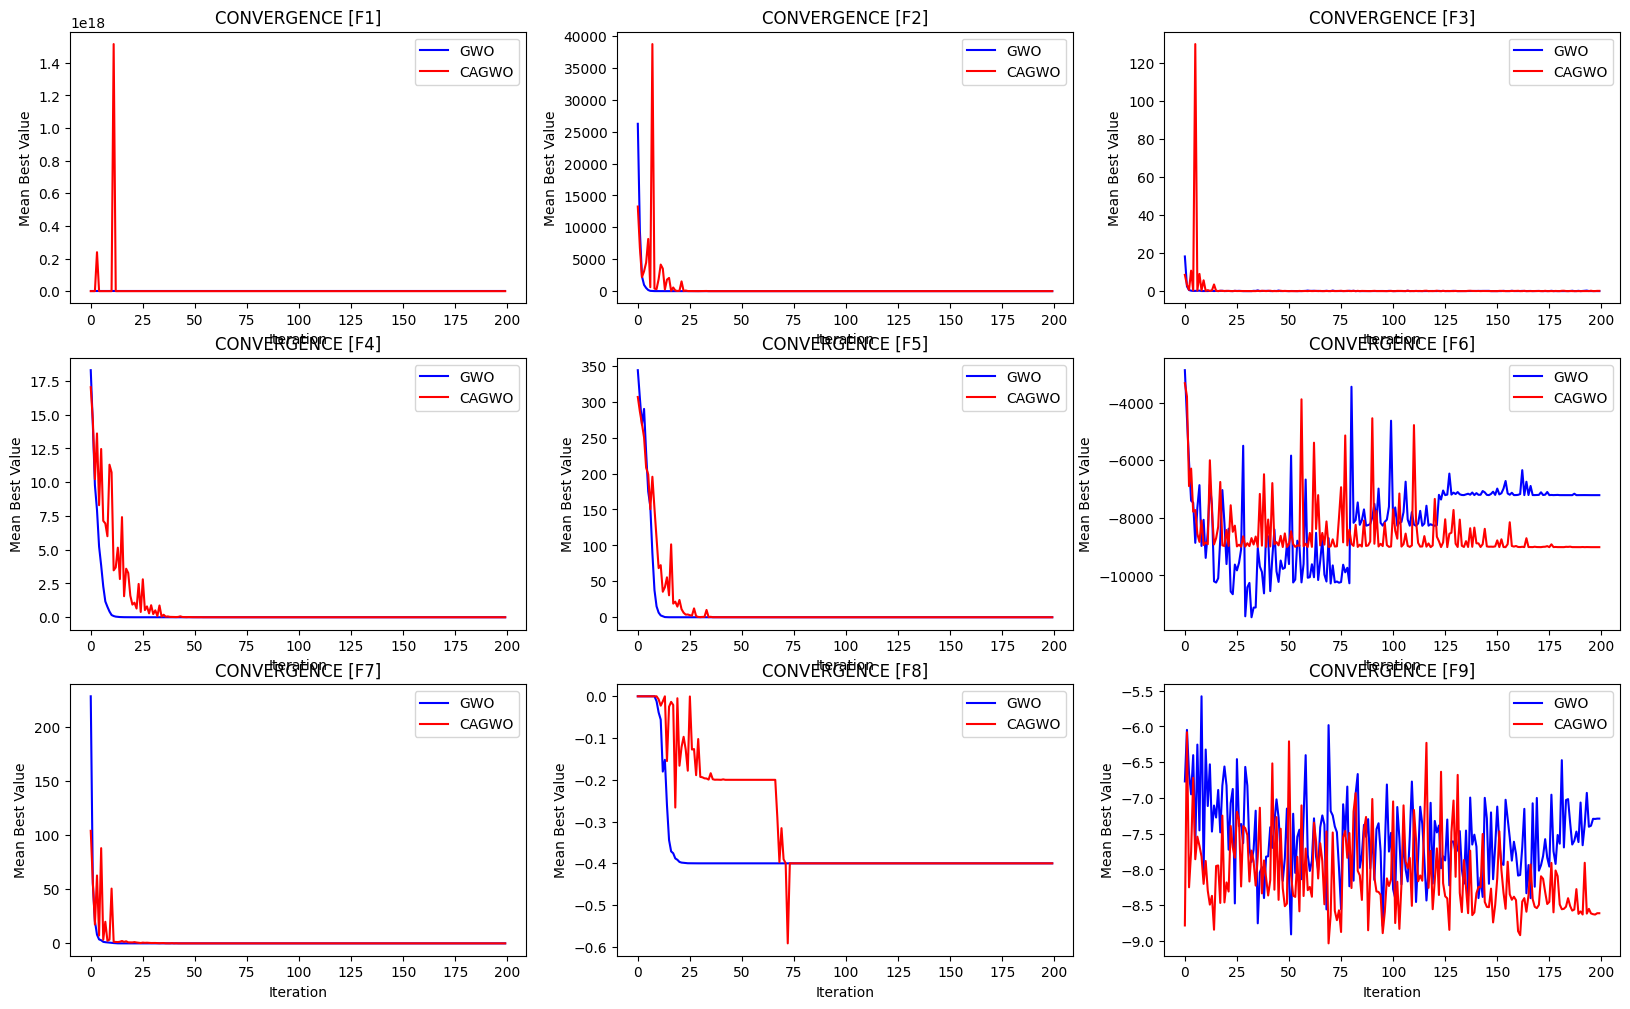

<Figure size 640x480 with 0 Axes>

In [157]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 3, figsize=(20, 12))

for i, (cagwo_func_benchmark, gwo_func_benchmark) in enumerate(zip(
        results_cagwo.functions_benchmarks, results_gwo.functions_benchmarks)):

    row = i // 3
    col = i % 3

    ax[row, col].set(
        #xlim=(0, results_gwo.iterations),
        #ylim=(min_y, max_y),
        title=f"CONVERGENCE [{results_gwo.functions_benchmarks[i].function.name}]",
        xlabel="Iteration",
        ylabel="Mean Best Value"
    )

    ax[row, col].plot(range(results_gwo.iterations), gwo_func_benchmark.solutions_avg_per_iteration, color="blue", label="GWO")
    ax[row, col].plot(range(results_cagwo.iterations), cagwo_func_benchmark.solutions_avg_per_iteration, color="red", label="CAGWO")
    ax[row, col].legend()

plt.show()
plt.savefig("./results/convergence.png", bbox_inches="tight")